In [1]:
from keras import backend as K
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
transactions = pd.read_csv('train.csv')

In [5]:
transactions.head(2)

ID_code  target    var_0   var_1    var_2  var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.093  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.389  12.3622  7.0433  5.6208   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  

[2 rows x 202 columns]

In [6]:
transactions.describe(include='all')

ID_code         target          var_0          var_1  \
count        200000  200000.000000  200000.000000  200000.000000   
unique       200000            NaN            NaN            NaN   
top     train_55435            NaN            NaN            NaN   
freq              1            NaN            NaN            NaN   
mean            NaN       0.100490      10.679914      -1.627622   
std             NaN       0.300653       3.040051       4.050044   
min             NaN       0.000000       0.408400     -15.043400   
25%             NaN       0.000000       8.453850      -4.740025   
50%             NaN       0.000000      10.524750      -1.608050   
75%             NaN       0.000000      12.758200       1.358625   
max             NaN       1.000000      20.315000      10.376800   

                var_2          var_3          var_4          var_5  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        10.715192       6.796529      11.078333      -5.065317   
std          2.640894       2.043319       1.623150       7.863267   
min          2.117100      -0.040200       5.074800     -32.562600   
25%          8.722475       5.254075       9.883175     -11.200350   
50%         10.580000       6.825000      11.108250      -4.833150   
75%         12.516700       8.324100      12.261125       0.924800   
max         19.353000      13.188300      16.671400      17.251600   

                var_6          var_7  ...        var_190        var_191  \
count   200000.000000  200000.000000  ...  200000.000000  200000.000000   
unique            NaN            NaN  ...            NaN            NaN   
top               NaN            NaN  ...            NaN            NaN   
freq              NaN            NaN  ...            NaN            NaN   
mean         5.408949      16.545850  ...       3.234440       7.438408   
std          0.866607       3.418076  ...       4.559922       3.023272   
min          2.347300       5.349700  ...     -14.093300      -2.691700   
25%          4.767700      13.943800  ...      -0.058825       5.157400   
50%          5.385100      16.456800  ...       3.203600       7.347750   
75%          6.003000      19.102900  ...       6.406200       9.512525   
max          8.447700      27.691800  ...      18.440900      16.716500   

              var_192        var_193        var_194        var_195  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         1.927839       3.331774      17.993784      -0.142088   
std          1.478423       3.992030       3.135162       1.429372   
min         -3.814500     -11.783400       8.694400      -5.261000   
25%          0.889775       0.584600      15.629800      -1.170700   
50%          1.901300       3.396350      17.957950      -0.172700   
75%          2.949500       6.205800      20.396525       0.829600   
max          8.402400      18.281800      27.928800       4.272900   

              var_196        var_197        var_198        var_199  
count   200000.000000  200000.000000  200000.000000  200000.000000  
unique            NaN            NaN            NaN            NaN  
top               NaN            NaN            NaN            NaN  
freq              NaN            NaN            NaN            NaN  
mean         2.303335       8.908158      15.870720      -3.326537  
std          5.454369       0.921625       3.010945      10.438015  
min        -14.209600       5.960600       6.299300     -38.852800  
25%         -1.946925       8.252800      13.829700     -11.

In [7]:
print(transactions.shape)

(200000, 202)


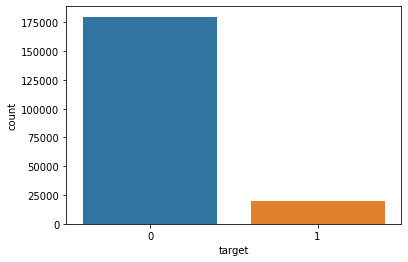

In [8]:
sns.countplot(transactions['target'],label="Count")
plt.show()

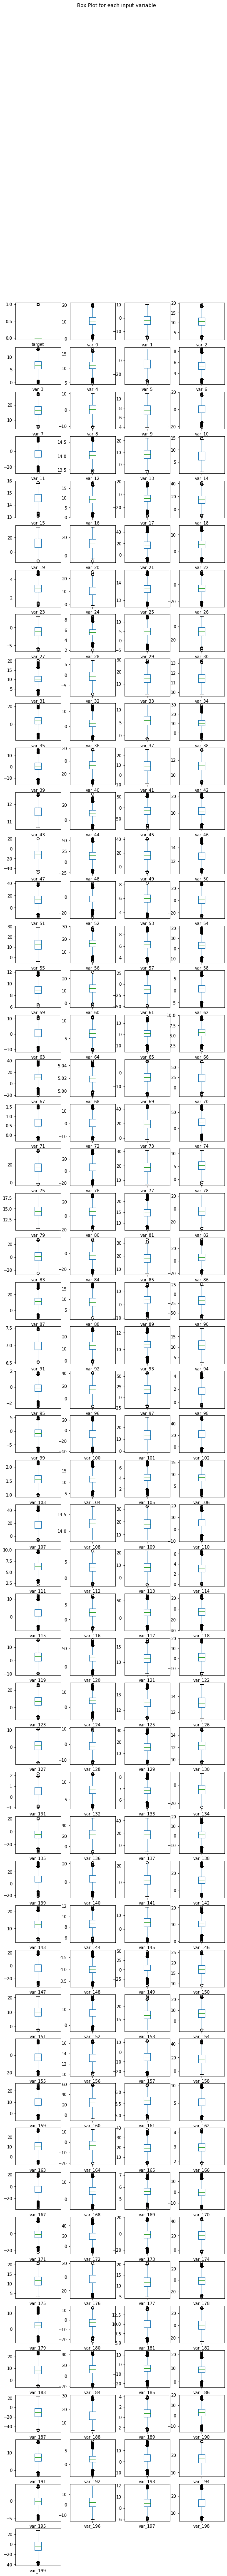

In [9]:
transactions.drop('ID_code', axis=1).plot(kind='box', subplots=True, layout=(51,4), sharex=False, sharey=False, figsize=(9,100), 
                                        title='Box Plot for each input variable')
plt.savefig('transactions_box')
plt.show()

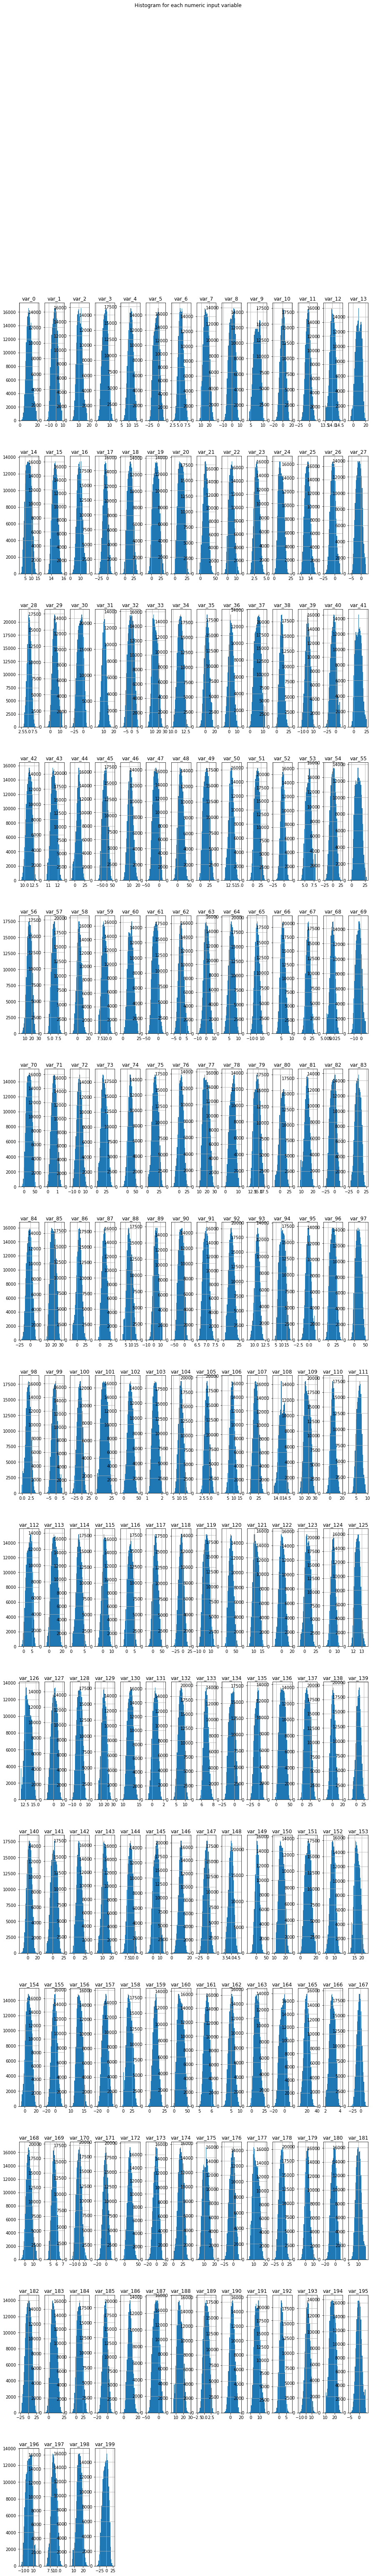

In [10]:
import pylab as pl

transactions.drop('target' ,axis=1).hist(bins=30,  figsize=(15,100))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('transactions_hist')
plt.show()

In [11]:
print("Correlation Matrix")
df = transactions.drop('ID_code', axis=1)
print(df.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=201):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 500))

Correlation Matrix
           target     var_0     var_1     var_2     var_3     var_4     var_5  \
target   1.000000  0.052390  0.050343  0.055870  0.011055  0.010915  0.030979   
var_0    0.052390  1.000000 -0.000544  0.006573  0.003801  0.001326  0.003046   
var_1    0.050343 -0.000544  1.000000  0.003980  0.000010  0.000303 -0.000902   
var_2    0.055870  0.006573  0.003980  1.000000  0.001001  0.000723  0.001569   
var_3    0.011055  0.003801  0.000010  0.001001  1.000000 -0.000322  0.003253   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.028285  0.002073 -0.000785 -0.001070  0.001206  0.003706 -0.001274   
var_196  0.023608  0.004386 -0.000377  0.003952 -0.002800  0.000513  0.002880   
var_197 -0.035303 -0.000753 -0.004157  0.001078  0.001164 -0.000046 -0.000535   
var_198 -0.053000 -0.005776 -0.004861 -0.000877 -0.001651 -0.001821 -0.000953   
var_199  0.025434  0.003850  0.002287  0.003855  0.000506 -0.000786  0.002767   

        

In [12]:
features = list(transactions[2:].columns.values)
features = features[2:]
features

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

In [13]:
X = transactions[features]
y = transactions['target']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.91
Accuracy of Logistic regression classifier on test set: 0.91


Area Under ROC Curve

In [17]:
from sklearn.metrics import roc_auc_score

prob_y_0 = logreg.predict_proba(X_train)
prob_y_0 = [p[1] for p in prob_y_0]
 
print( roc_auc_score(y_train, prob_y_0) )

0.8628742929873314


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

clf.fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.90


In [19]:
prob_y_1 = clf.predict_proba(X_train)

prob_y_1 = clf.predict_proba(X_train)
prob_y_1 = [p[1] for p in prob_y_1]
 
print( roc_auc_score(y_train, prob_y_1) )


1.0


In [22]:
import scikitplot as skplt


y_true = y_train
y_probas = prob_y_1
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))